In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setting Style - press 'shift + double tab' for checking available options
sns.set(style = 'darkgrid')

### Numerical Data Plotting
- relplot()
- lineplot()
- scatterplot()

In [3]:
# seaborn has inbuilt datasets. we can use them.
tips=sns.load_dataset('tips')
tips.tail()
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### =========================================================
### Relational/Scatter Plot :

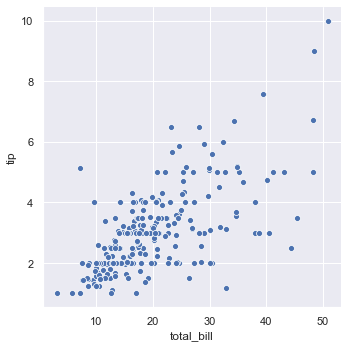

In [4]:
# Use 'shift + tab' or 'shift + double tab' option to check the details of available methods
sns.relplot(x='total_bill',y='tip',data=tips)

In [5]:
print(dir(sns.FacetGrid))

# We can plot multiple graphs using facet option of seaborn

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bottom_axes', '_clean_axis', '_facet_color', '_facet_plot', '_finalize_grid', '_get_palette', '_inner_axes', '_left_axes', '_legend_out', '_margin_titles', '_not_bottom_axes', '_not_left_axes', '_update_legend_data', 'add_legend', 'ax', 'despine', 'facet_axis', 'facet_data', 'map', 'map_dataframe', 'savefig', 'set', 'set_axis_labels', 'set_titles', 'set_xlabels', 'set_xticklabels', 'set_ylabels', 'set_yticklabels']


No     151
Yes     93
Name: smoker, dtype: int64


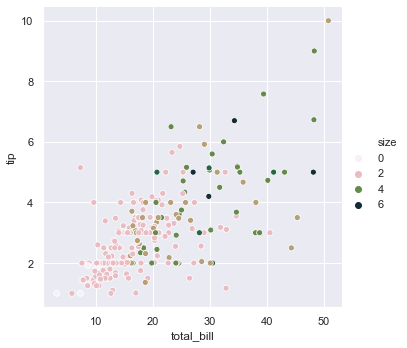

In [6]:
print(tips['smoker'].value_counts())
sns.relplot(x='total_bill',y='tip',data=tips,hue='size',palette='ch:r=-0.9,l=0.95') # we can use style to introduce 4th variable
# hue changes color

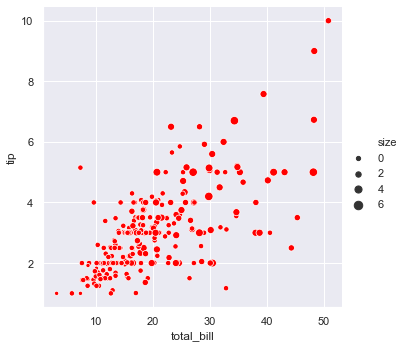

In [7]:
sns.relplot(x='total_bill',y='tip',data=tips,color='red', size='size',palette='ch:r=-0.9,l=0.95')

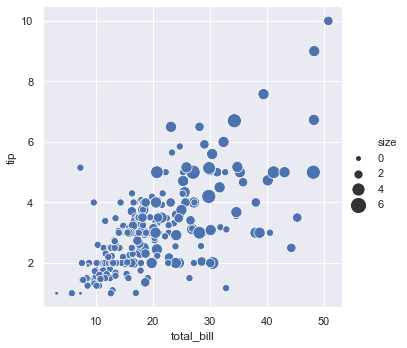

In [8]:
# sizes argument normalizes the size according to the data and provided values
sns.relplot(x='total_bill',y='tip',data=tips, size='size',sizes=(15,200))  

### =======================================================
### Line Graphs :

In [9]:
from numpy.random import randn

In [10]:
print('randn:{},cumsumvalue={} type={}, '.format(randn(1),randn(1).cumsum(),type(randn(1).cumsum())))
df = pd.DataFrame(dict(time=np.arange(500),value=randn(500).cumsum()))   # randn gives out float value. cumsum is cumulative sum
df.head()

randn:[0.05208614],cumsumvalue=[-0.99612743] type=<class 'numpy.ndarray'>, 


,time,value
0,0,-2.043524
1,1,-1.518857
2,2,-1.318594
3,3,-0.311682
4,4,-0.011279


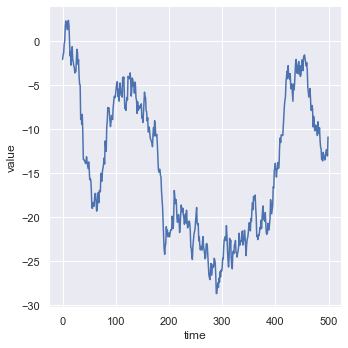

In [11]:
sns.relplot(x='time',y='value',kind='line',data=df)  # we can give sort=False, 
                                                     # it will give us 'wiggly giggly' plot if the data is not sorted

In [12]:
fmri=sns.load_dataset('fmri')
print(fmri['region'].value_counts())
fmri.head()


frontal     532
parietal    532
Name: region, dtype: int64


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


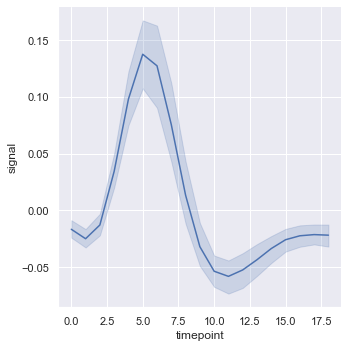

In [13]:
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri) # ci=False  for not showing shaded confidence interval
# Shaded region is 95% confidence interval.

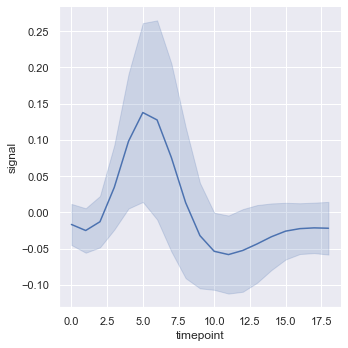

In [14]:
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,ci='sd') # # ci='sd' is for standard deviation

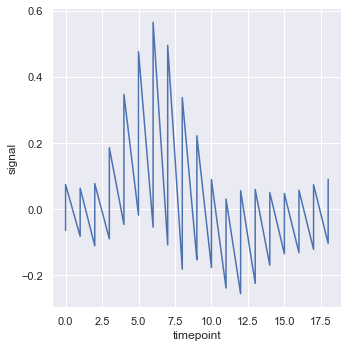

In [15]:
sns.relplot(x='timepoint',y='signal',kind='line',estimator=None,data=fmri) # useless plot

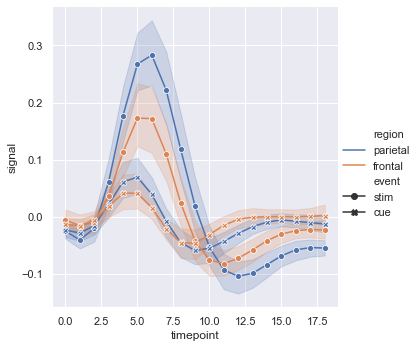

In [16]:
# semantic mapping using hue and size etc

sns.relplot(x='timepoint',y='signal',kind='line',hue='region',style='event',data=fmri,markers=True,dashes=False) 
# we can pass style='event' as well it will generate dotted line etc. 

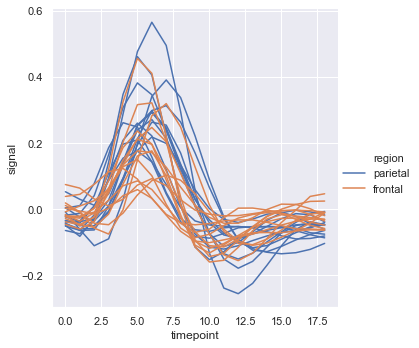

In [17]:
sns.relplot(x='timepoint',y='signal',hue='region',units= 'subject',estimator=None,kind='line',data=fmri.query("event=='stim'"))

In [18]:
dots = sns.load_dataset('dots').query("align=='dots'")   # using query to get subset of the dataset
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


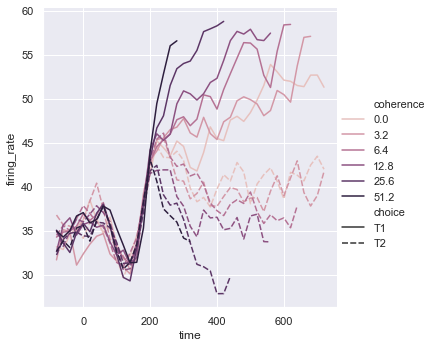

In [19]:
palette= sns.cubehelix_palette(light=0.8,n_colors=6)
sns.relplot(x='time',y='firing_rate',kind='line',hue='coherence',style='choice',data=dots,palette=palette)

In [20]:
df = pd.DataFrame(dict(time=pd.date_range('2019-06-02',periods=500),value=randn(500).cumsum()))
df.head()

,time,value
0,2019-06-02,0.164917
1,2019-06-03,1.011169
2,2019-06-04,0.395269
3,2019-06-05,0.261446
4,2019-06-06,-0.365474


C:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


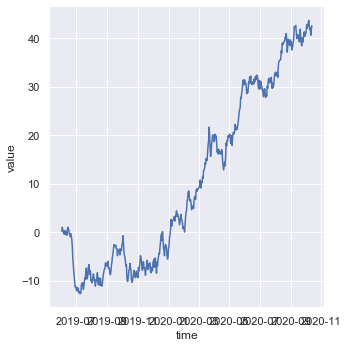

In [21]:
sns.relplot(x='time',y='value',kind='line',data=df)

Above figure has x-axis very shabby. we can use autoformat method as below

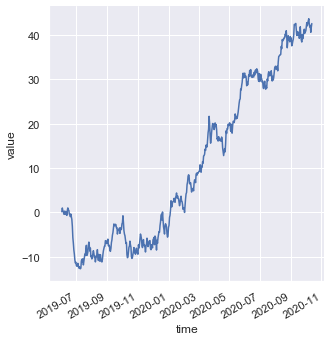

In [22]:
g=sns.relplot(x='time',y='value',kind='line',data=df)
g.fig.autofmt_xdate()

### Multiple plots in same figure in seaborn  :

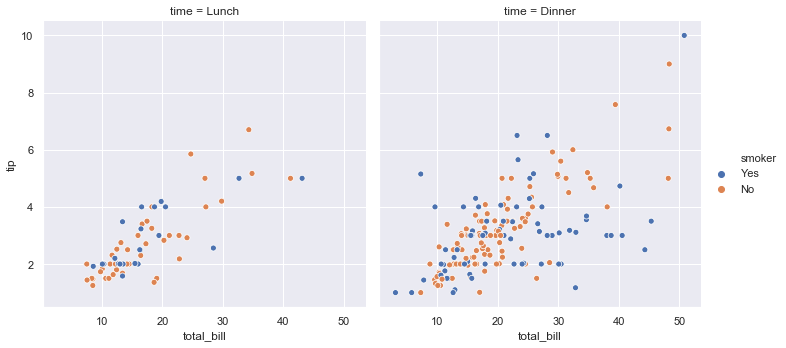

In [23]:
sns.relplot(x='total_bill',y='tip',hue='smoker',col='time',data=tips)

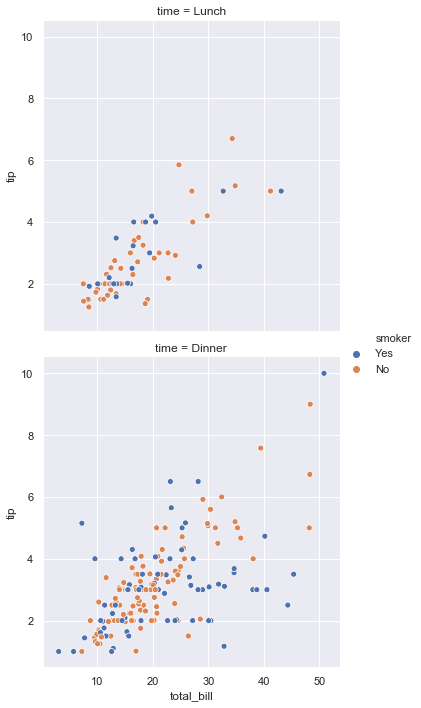

In [24]:
# This is same as above only row option is used instead of col
sns.relplot(x='total_bill',y='tip',hue='smoker',row='time',data=tips)

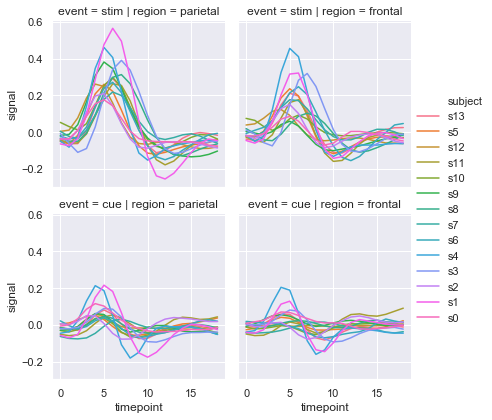

In [25]:
sns.relplot(x='timepoint',y='signal',hue='subject',col='region',row='event',height=3,kind='line',estimator=None,data=fmri)

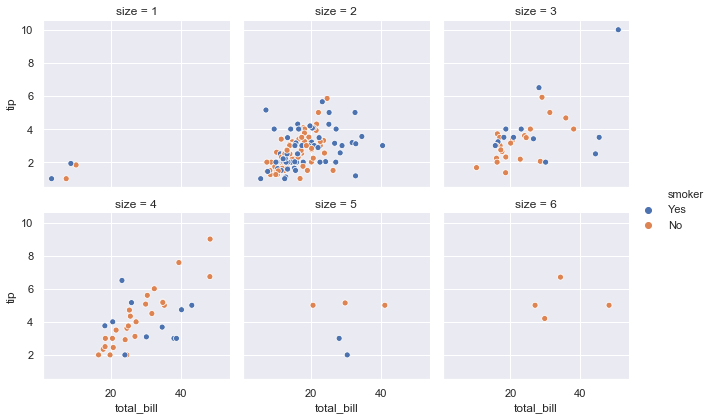

In [26]:
sns.relplot(x='total_bill',y='tip',hue='smoker',col='size',data=tips,col_wrap=3,height=3) # col_wrap to set max plot on the line

                                   **Above figures are Lattice Visualtions**

In [27]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### =================================================
### Scatter Plot : 

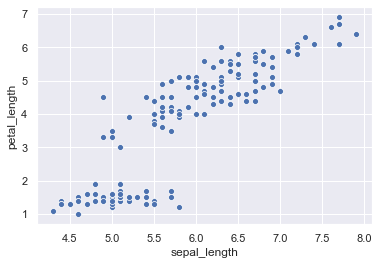

In [28]:
sns.scatterplot(x=iris['sepal_length'],y=iris['petal_length'])

### Categorical Data Plotting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- bargraph()
- countplot()

In [29]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### catplot (Categorical Plot): 

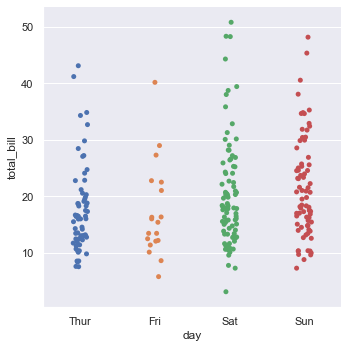

In [30]:
sns.catplot(x='day',y='total_bill',data=tips)   # jitter = False for no considering deviation

#### Swarmplot :

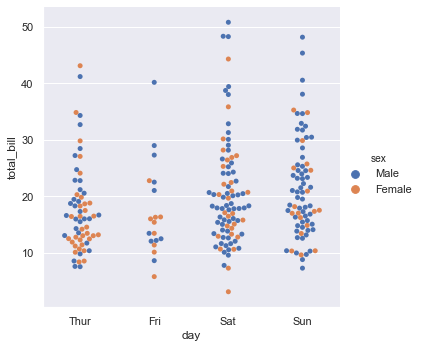

In [31]:
# sns.swarmplot()
sns.catplot(x='day',y='total_bill',data=tips,kind='swarm',hue='sex') 

#### Boxplot :

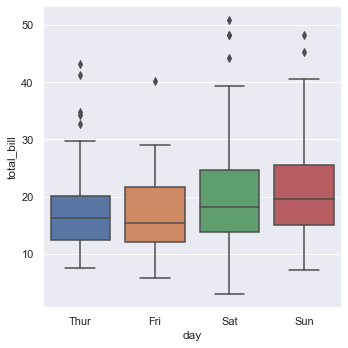

In [32]:
sns.catplot(x='day',y='total_bill',data=tips,kind='box') 

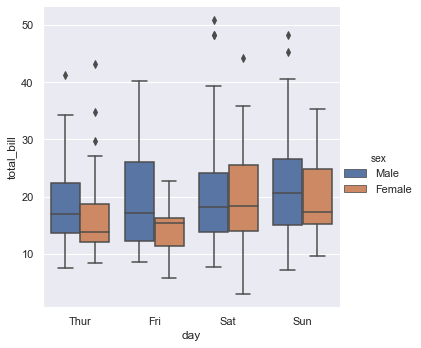

In [33]:
sns.catplot(x='day',y='total_bill',data=tips,kind='box',hue='sex') 

In [34]:
diamonds=sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Boxen plot :

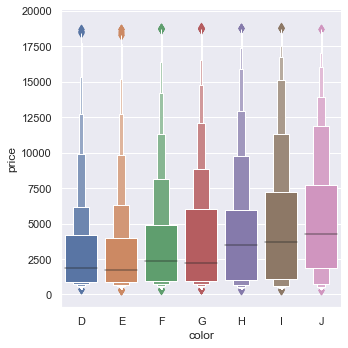

In [35]:
sns.catplot(x='color',y='price',kind='boxen',data=diamonds.sort_values('color'))

#### violin plot - kernel density estimation :

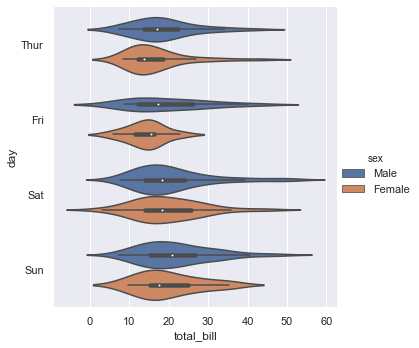

In [36]:
sns.catplot(x='total_bill',y='day',kind='violin',hue='sex',data=tips)

#### Bar graph : 

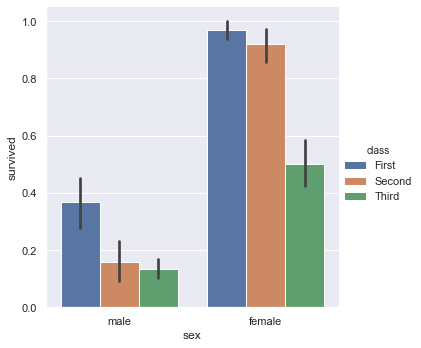

In [37]:
sns.catplot(x='sex',y='survived',hue='class',kind='bar',data=titanic)

This indicates that if a person was a female and was travelling in first class, chances was very high of their survival

# ================================================================

#### Countplot (is a bar graph):

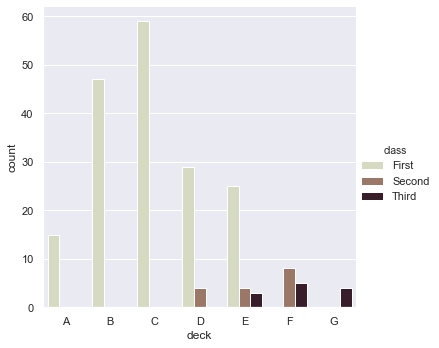

In [39]:
sns.catplot(x='deck',kind='count',hue='class',palette='ch:0.5',data=titanic)

#### Point plots :

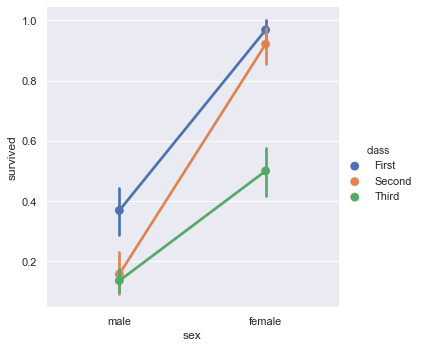

In [40]:
sns.catplot(x='sex',y='survived',hue='class',kind='point',data=titanic)

### Visualizing Distribution of the Data :
- distplot()
- kdeplot()
- jointplot()
- rugplot()

In [75]:
x = randn(100)
type(x)
print(x)

[-0.33064512  0.00577491 -0.19705114 -0.05510843  1.78986979  0.13152836
 -0.79627656 -2.21631988  0.6815944  -0.98572904  2.59513553 -0.61007562
 -0.13236434 -0.65518458 -0.15384025 -0.30965759  1.66945658 -1.88449195
 -0.9444144  -0.60325157 -1.38509176  0.03905519 -0.1347358  -0.53052829
  0.76089383 -1.79711286  0.76381081 -0.15226127  0.14049435  0.77498599
 -0.5505416   0.95205856 -0.04419079  0.08498093  1.06015289 -1.20618507
  1.99633906  0.53078389 -1.42203331 -1.24553768  0.64733011  0.07479337
 -1.45324237  0.60146468 -0.49141409  1.36155289 -0.58673769  0.371139
  2.15147553 -1.24583781 -1.13927926  1.04900151  0.2438444   0.17212136
 -1.04813268 -0.35603012 -0.63842298  0.10528189  2.0918642  -1.28038522
  1.31087325  0.48644691 -0.0435099  -0.27524595 -1.23436283  0.52843038
 -1.16653601  0.22521702  0.59522375 -1.64468294 -1.34784866  0.58420246
  0.93974259  0.71002979 -0.85224097 -1.82994556  0.53214193  2.11926274
  0.55915726  1.38113119  0.22857661 -0.07140053 -0.4

#### Distplot :

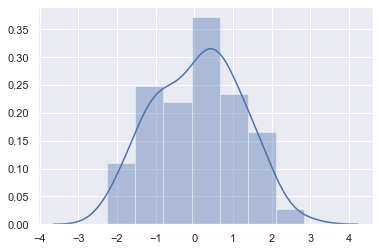

In [71]:
sns.distplot(x)
# The line kernel density function

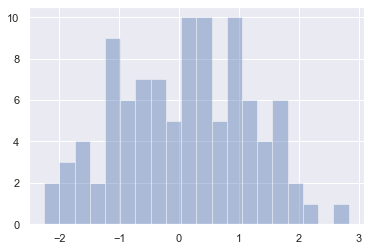

In [72]:
sns.distplot(x,kde=False,bins=20)

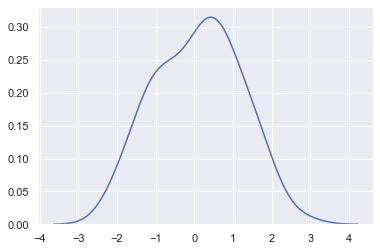

In [73]:
sns.distplot(x, kde=True, hist=False, rug=False, bins=30) 
# Normal distribution is calculated for kde. so that area under the curve is 1. This is not so smooth kdeplot

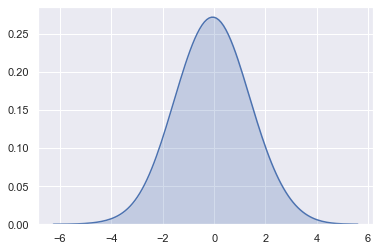

In [79]:
sns.kdeplot(x, shade=True,cbar=True,bw=1)   
# Changing Bandwidth makes the plot more smooth. Try adding cut parameter.

#### Contour Plot :

In [81]:
tips.head()
x = tips['total_bill']
y = tips['tip']

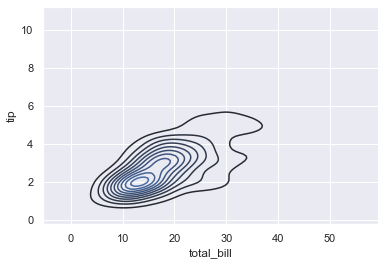

In [92]:
sns.kdeplot(x,y)    # This gives us contour plot

#### Jointplot : 

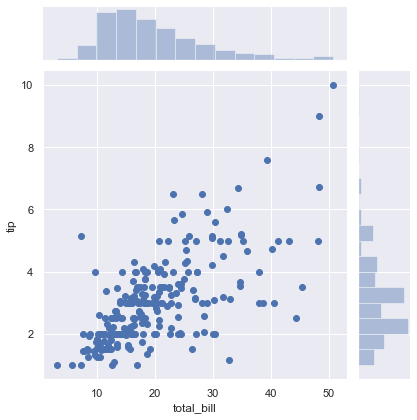

In [84]:
sns.jointplot(x=x,y=y)

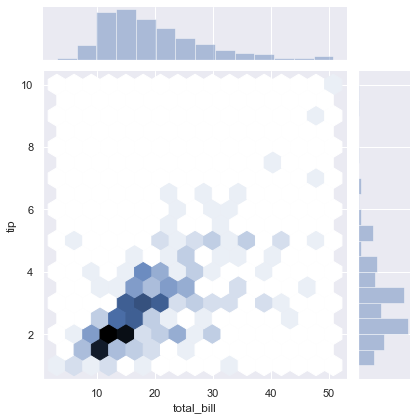

In [90]:
sns.axes_style('darkgrid')
sns.jointplot(x=x,y=y,kind='hex')

#### Kernel Density Plot for two quantitative variables :

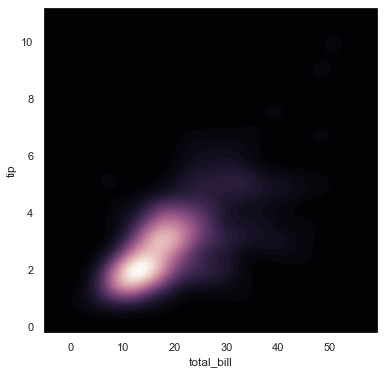

In [96]:
f,ax= plt.subplots(figsize=(6,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=True)
sns.kdeplot(x,y,cmap=cmap,n_levels=60,shade=True)

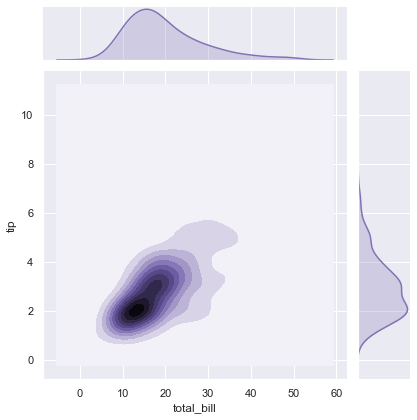

In [98]:
g = sns.jointplot(x,y,kind='kde',color='m')

#### Pairplot :

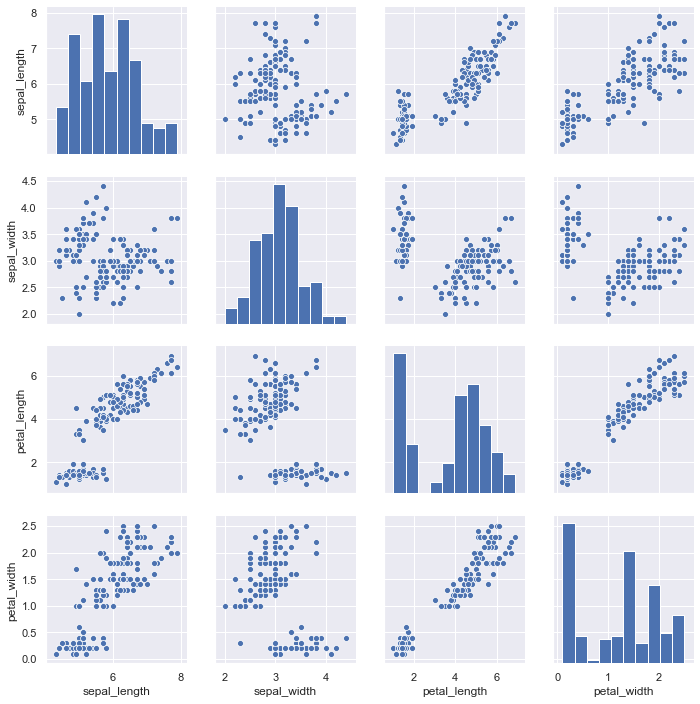

In [101]:
sns.pairplot(iris)

### Linear Regression and Relationship
- regplot()
- lmplot()

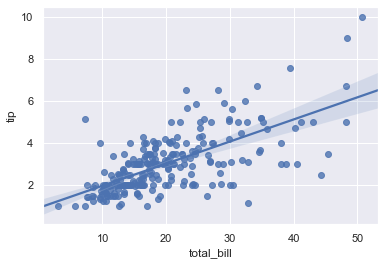

In [102]:
# regplot - scatter plot with overlaid regression line.

sns.regplot(x='total_bill',y='tip',data=tips)

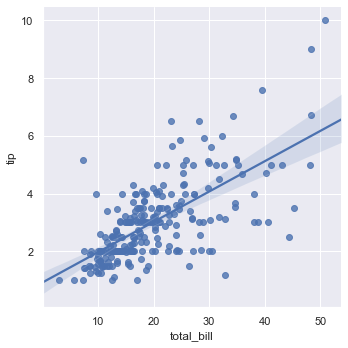

In [105]:
# lmplot - This is also a scatter plot with overlaid regression line
sns.lmplot(x='total_bill',y='tip',data=tips)

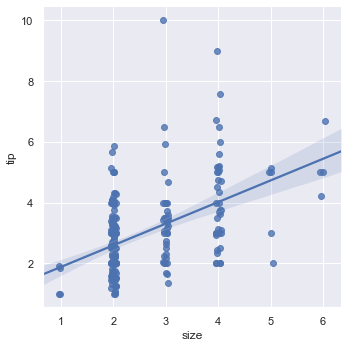

In [106]:
sns.lmplot(x='size',y='tip',data=tips,x_jitter=0.05)  # Jitter is added to add some noise, since size is discrete variable.

In [111]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


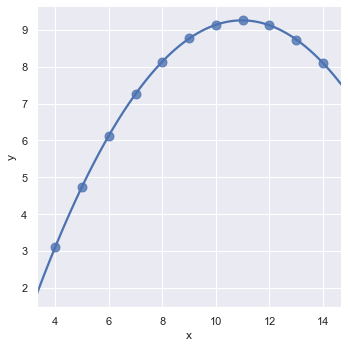

In [116]:
sns.lmplot(x='x',y='y',
           data=anscombe.query("dataset=='II'"),
           ci=None, 
           scatter_kws={'s':80},
           order = 2)   
# To fir the regression line to this plot we add order to get polynomial equation of the regression line. here order = 2.

### Controlling Plotted Figure Asthetics
- Figure Styling
- Axes Styling
- Color Palettes